## ICP11 -Autoencoder

In this example, we will use an autoencoder to 'learn' to recreate hand written digits.

In [1]:
import numpy as np
import pandas as pd

### Load and normalize our data

In [2]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


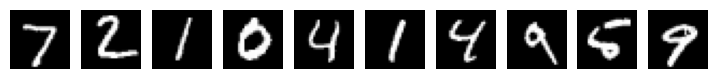

In [3]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

In [4]:
performance = pd.DataFrame({"model":[], "MSE-loss":[]})

### Create an autoencoder model.

In [25]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 6 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 500)               392500    
                                                                 
 dense_33 (Dense)            (None, 300)               150300    
                                                                 
 dense_34 (Dense)            (None, 100)               30100     
                                                                 
 dense_35 (Dense)            (None, 6)                 606       
                                                                 
 dense_36 (Dense)            (None, 100)               700       
                                                                 
 dense_37 (Dense)            (None, 300)               30300     
                                                                 
 dense_38 (Dense)            (None, 500)              

### Train the autoencoder model.

In [26]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 7s 13ms/step - loss: 0.2335 - val_loss: 0.1861
Epoch 2/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1648 - val_loss: 0.1517
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1476 - val_loss: 0.1438
Epoch 4/10
469/469 [==============================] - 6s 14ms/step - loss: 0.1423 - val_loss: 0.1406
Epoch 5/10
469/469 [==============================] - 7s 16ms/step - loss: 0.1392 - val_loss: 0.1380
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1369 - val_loss: 0.1365
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1350 - val_loss: 0.1348
Epoch 8/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1333 - val_loss: 0.1333
Epoch 9/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1319 - val_loss: 0.1323
Epoch 10/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1305 - val_lo

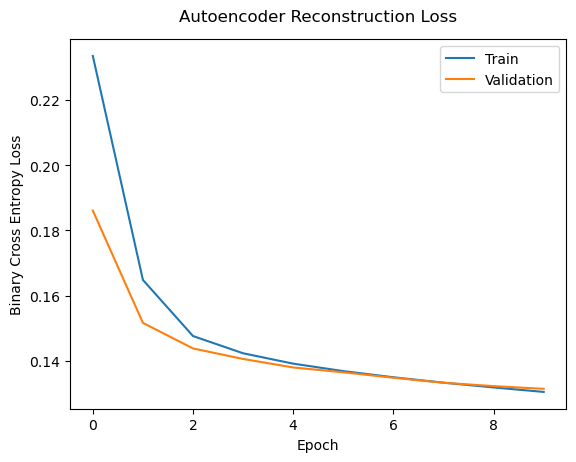

In [27]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

In [28]:
reconstructed_images = autoencoder.predict(test_images)

313/313 [==============================] - 1s 4ms/step


### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

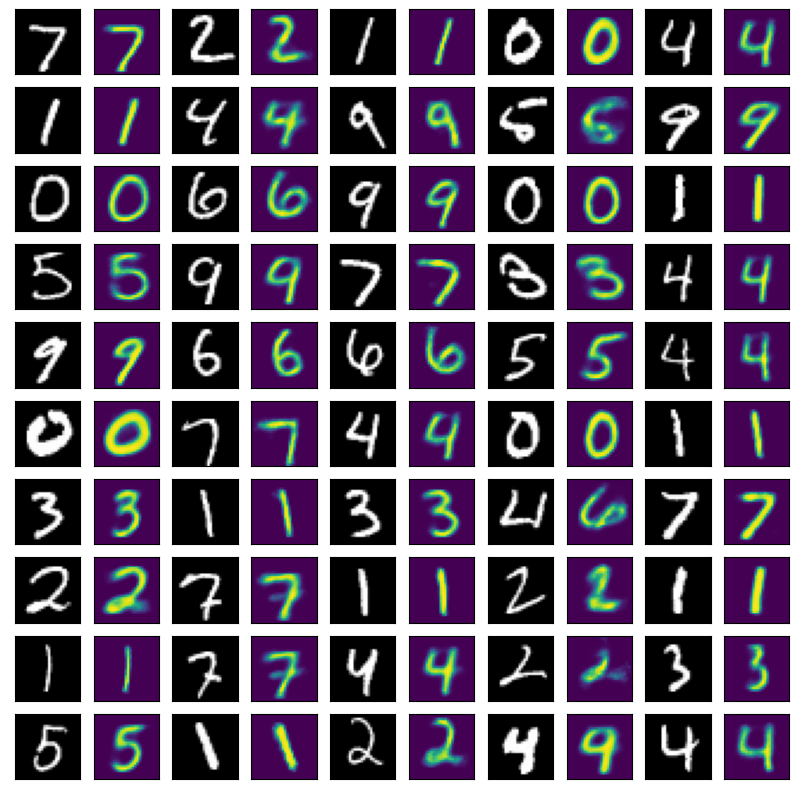

In [29]:
#6N

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

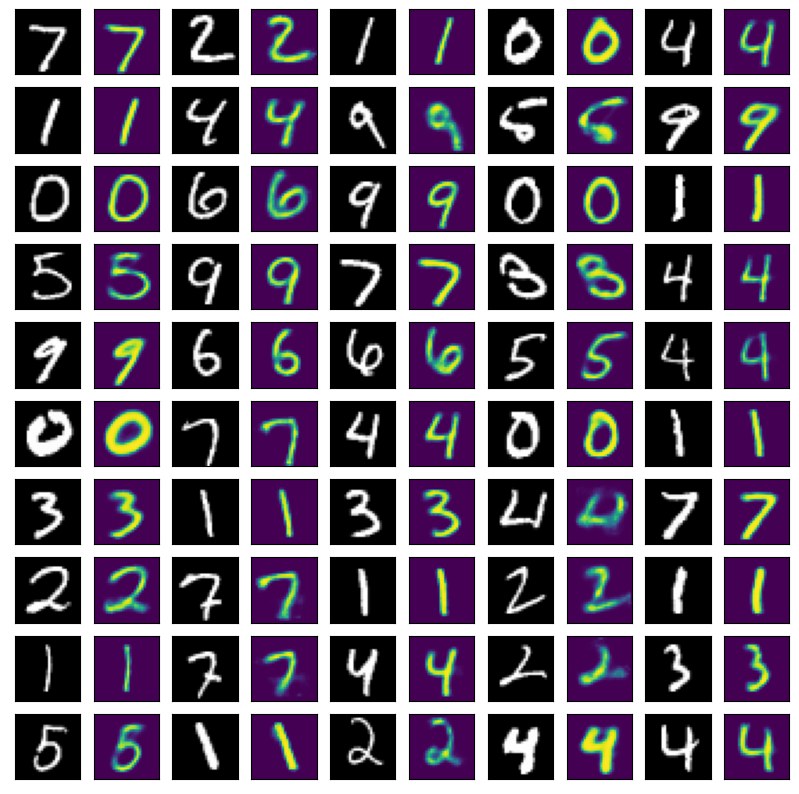

In [14]:
#16N

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

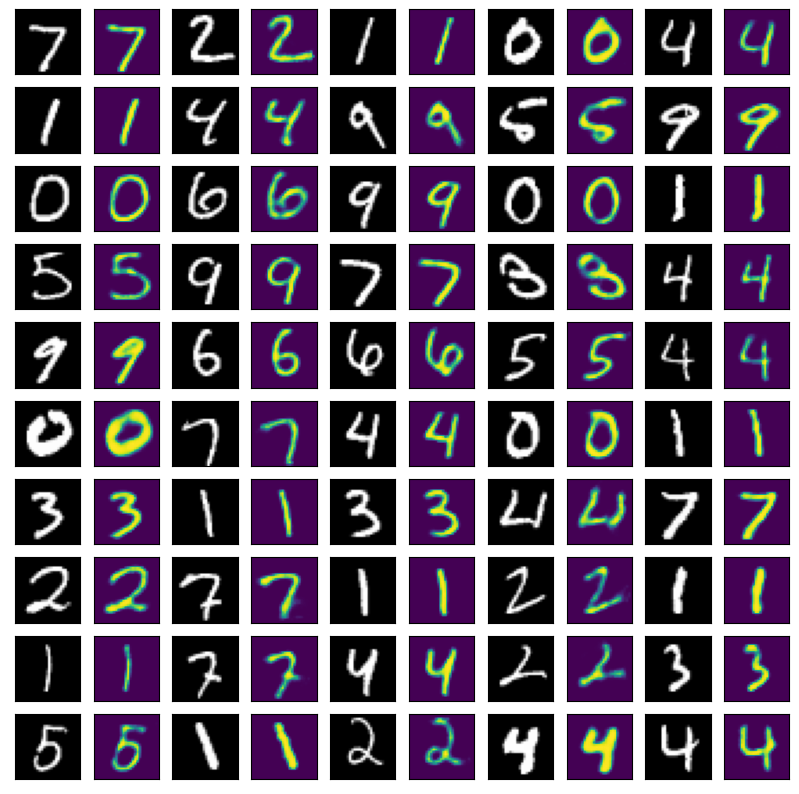

In [22]:
#100N

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [30]:
mse = autoencoder.evaluate(test_images, test_images)

313/313 [==============================] - 2s 5ms/step - loss: 0.1314


In [31]:
performance= pd.concat([performance, pd.DataFrame({'model':'6N','MSE-loss':mse},index=[0])])
performance

,model,MSE-loss
0,16N,0.102415
0,100N,0.081547
0,6N,0.131442


Based on the evaluation results, the model with a bottleneck of 100 neurons has the lowest mean squared error (MSE) loss of 0.0815, which indicates better performance compared to the other models with bottleneck sizes of 6 and 16 neurons. Therefore, it can be confirmed that the model with a bottleneck of 100 neurons is the better performing model.